In [ ]:
# Install Libraries
!pip install textblob
!pip install tweepy

In [ ]:
from google.colab import drive
#drive.mount("/content/drive")
#drive.mount("/content/drive", force_remount=true)

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import re
import string
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [ ]:
# Authentication
consumerKey = "ScaQhkMq0zBtgV8RVIY7rBGvE"
consumerSecret = "dmfNqq2BJwRzvnwxc80ARLf7EkhKkgHmEsz7PT0ixfEUyfWPrx"
accessToken = "1088432068403572738-VVBGxQ44GO6Cnpo8hkUUuJJ66yRT0H"
accessTokenSecret = "Ugt46M9eNhxxyfUGw7t3OCaciPB7h08PugZyiOKfJql2J"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [ ]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("")
noOfTweet = int(input (""))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

zanu pf
100


In [ ]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  200
positive number:  72
negative number:  58
neutral number:  70


In [ ]:
tweet_list

,0
0,RT @CryFreedom3: @nelsonchamisa All zanu pf ne...
1,@freemanchari @maDube_ Ummmm Freeman kwamakuen...
2,RT @KetaiMagama: @nelsonchamisa What's your pl...
3,@drjaytee87 Matova kunana Chiwenga tsve kurwis...
4,If land is for zanu pf supporters and Chinese ...
...,...
195,RT @PedzisaiRuhanya: The @ZECzim under Justice...
196,RT @EdmundKudzayi: A common feature of Zimbabw...
197,RT @PedzisaiRuhanya: The @ZECzim under Justice...
198,Will you remove Zanu PF ? https://t.co/fqBj3lVCoO


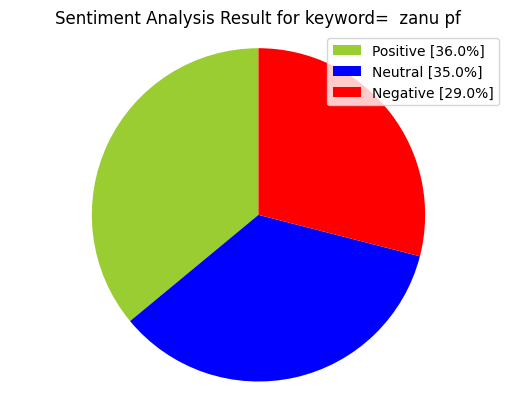

In [ ]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
tweet_list.drop_duplicates(inplace = True)

Type Markdown and LaTeX:  𝛼2 
#Extracting text values text_all = tweet_list[0].values text_neutral = neutral_list[0].values text_positive = positive_list[0].values text_negative = negative_list[0].values

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @CryFreedom3: @nelsonchamisa All zanu pf ne...,RT @CryFreedom3: @nelsonchamisa All zanu pf ne...
1,@freemanchari @maDube_ Ummmm Freeman kwamakuen...,@freemanchari @maDube_ Ummmm Freeman kwamakuen...
2,RT @KetaiMagama: @nelsonchamisa What's your pl...,RT @KetaiMagama: @nelsonchamisa What's your pl...
3,@drjaytee87 Matova kunana Chiwenga tsve kurwis...,@drjaytee87 Matova kunana Chiwenga tsve kurwis...
4,If land is for zanu pf supporters and Chinese ...,If land is for zanu pf supporters and Chinese ...
...,...,...
192,@HealZim @ZANUPF_Official Your vote is your se...,@HealZim @ZANUPF_Official Your vote is your se...
193,@DMwonzora Argument yako yekuti u voted for th...,@DMwonzora Argument yako yekuti u voted for th...
194,@zanupf_patriots The other thing..... If the s...,@zanupf_patriots The other thing..... If the s...
198,Will you remove Zanu PF ? https://t.co/fqBj3lVCoO,Will you remove Zanu PF ? https://t.co/fqBj3lVCoO


In [ ]:
tweet_list

,0,text
0,RT @CryFreedom3: @nelsonchamisa All zanu pf ne...,RT @CryFreedom3: @nelsonchamisa All zanu pf ne...
1,@freemanchari @maDube_ Ummmm Freeman kwamakuen...,@freemanchari @maDube_ Ummmm Freeman kwamakuen...
2,RT @KetaiMagama: @nelsonchamisa What's your pl...,RT @KetaiMagama: @nelsonchamisa What's your pl...
3,@drjaytee87 Matova kunana Chiwenga tsve kurwis...,@drjaytee87 Matova kunana Chiwenga tsve kurwis...
4,If land is for zanu pf supporters and Chinese ...,If land is for zanu pf supporters and Chinese ...
...,...,...
192,@HealZim @ZANUPF_Official Your vote is your se...,@HealZim @ZANUPF_Official Your vote is your se...
193,@DMwonzora Argument yako yekuti u voted for th...,@DMwonzora Argument yako yekuti u voted for th...
194,@zanupf_patriots The other thing..... If the s...,@zanupf_patriots The other thing..... If the s...
198,Will you remove Zanu PF ? https://t.co/fqBj3lVCoO,Will you remove Zanu PF ? https://t.co/fqBj3lVCoO


In [ ]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text
0,RT @CryFreedom3: @nelsonchamisa All zanu pf ne...,all zanu pf needs is
1,@freemanchari @maDube_ Ummmm Freeman kwamakuen...,ummmm freeman kwamakuenda uku ndikokunodi...
2,RT @KetaiMagama: @nelsonchamisa What's your pl...,what s your plan going into 2023 the days o...
3,@drjaytee87 Matova kunana Chiwenga tsve kurwis...,matova kunana chiwenga tsve kurwisa zanu opp...
4,If land is for zanu pf supporters and Chinese ...,if land is for zanu pf supporters and chinese ...
5,RT @PedzisaiRuhanya: Both @DMwonzora and ZANU ...,both and zanu pf are afraid of free and fai...
6,RT @mdczimbabwe: Mwonzora is afraid of an elec...,mwonzora is afraid of an election he wants t...
7,@phashake1 I blame Zanu pf \n\n#RegisterToVoteZW,i blame zanu pf registertovotezw
8,RT @OneAfricanaCity: @ProfJNMoyo Prof you are ...,prof you are a rare breed but i have a ques...
9,@ANTI_ZANU_PF @ZimViral @DownloaderBot,zanu pf


In [ ]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @CryFreedom3: @nelsonchamisa All zanu pf ne...,all zanu pf needs is,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,@freemanchari @maDube_ Ummmm Freeman kwamakuen...,ummmm freeman kwamakuenda uku ndikokunodi...,0.000000,0.000000,positive,0.000,0.828,0.172,0.4019
2,RT @KetaiMagama: @nelsonchamisa What's your pl...,what s your plan going into 2023 the days o...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
3,@drjaytee87 Matova kunana Chiwenga tsve kurwis...,matova kunana chiwenga tsve kurwisa zanu opp...,0.000000,0.200000,negative,0.151,0.849,0.000,-0.4939
4,If land is for zanu pf supporters and Chinese ...,if land is for zanu pf supporters and chinese ...,0.000000,0.000000,positive,0.000,0.828,0.172,0.4404
5,RT @PedzisaiRuhanya: Both @DMwonzora and ZANU ...,both and zanu pf are afraid of free and fai...,0.166667,0.866667,positive,0.000,0.694,0.306,0.7571
6,RT @mdczimbabwe: Mwonzora is afraid of an elec...,mwonzora is afraid of an election he wants t...,-0.112500,0.600000,neutral,0.000,1.000,0.000,0.0000
7,@phashake1 I blame Zanu pf \n\n#RegisterToVoteZW,i blame zanu pf registertovotezw,0.000000,0.000000,negative,0.444,0.556,0.000,-0.3400
8,RT @OneAfricanaCity: @ProfJNMoyo Prof you are ...,prof you are a rare breed but i have a ques...,0.300000,0.900000,positive,0.000,0.839,0.161,0.5927
9,@ANTI_ZANU_PF @ZimViral @DownloaderBot,zanu pf,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [ ]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [ ]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [ ]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,52,34.21
neutral,52,34.21
positive,48,31.58


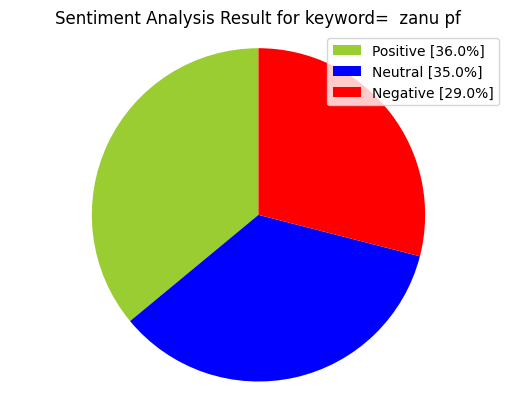

In [ ]:
labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [ ]:
#Function to Create Wordcloud

def create_wordcloud(text):
    mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = mask,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    wc.generate(str(text))
    wc.to_file("wc.png")
    print("Word Cloud Saved Successfully")
    path="wc.png"
    display(Image.open(path))

In [ ]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,100.50
neutral,80.44
positive,96.73


In [ ]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,18.02
neutral,13.42
positive,17.19


In [ ]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [ ]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [ ]:
#Removing stopwords
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

In [ ]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [ ]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [ ]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @CryFreedom3: @nelsonchamisa All zanu pf ne...,all zanu pf needs is,0.0,0.0,neutral,0.000,1.000,0.000,0.0000,26,5,all zanu pf needs is,"[, all, zanu, pf, needs, is, ]","[, zanu, pf, needs, ]","[, zanu, pf, need, ]"
1,@freemanchari @maDube_ Ummmm Freeman kwamakuen...,ummmm freeman kwamakuenda uku ndikokunodi...,0.0,0.0,positive,0.000,0.828,0.172,0.4019,100,15,ummmm freeman kwamakuenda uku ndikokunodi...,"[, ummmm, freeman, kwamakuenda, uku, ndikokuno...","[, ummmm, freeman, kwamakuenda, uku, ndikokuno...","[, ummmm, freeman, kwamakuenda, uku, ndikokuno..."
2,RT @KetaiMagama: @nelsonchamisa What's your pl...,what s your plan going into 2023 the days o...,0.0,0.0,neutral,0.000,1.000,0.000,0.0000,111,22,what s your plan going into the days of te...,"[, what, s, your, plan, going, into, the, days...","[, plan, going, days, telling, people, plan, n...","[, plan, go, day, tell, peopl, plan, noth, ]"
3,@drjaytee87 Matova kunana Chiwenga tsve kurwis...,matova kunana chiwenga tsve kurwisa zanu opp...,0.0,0.2,negative,0.151,0.849,0.000,-0.4939,130,22,matova kunana chiwenga tsve kurwisa zanu opp...,"[, matova, kunana, chiwenga, tsve, kurwisa, za...","[, matova, kunana, chiwenga, tsve, kurwisa, za...","[, matova, kunana, chiwenga, tsve, kurwisa, za..."
4,If land is for zanu pf supporters and Chinese ...,if land is for zanu pf supporters and chinese ...,0.0,0.0,positive,0.000,0.828,0.172,0.4404,69,15,if land is for zanu pf supporters and chinese ...,"[if, land, is, for, zanu, pf, supporters, and,...","[land, zanu, pf, supporters, chinese, take, ba...","[land, zanu, pf, support, chines, take, back, ]"


In [ ]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

152 Number of reviews has 727 words


In [ ]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

,,aaahhh,abl,abus,accept,accus,acr,act,activist,actual,address,affect,afraid,agent,agre,ahead,airport,aizv,aliv,allainc,allianc,allow,alon,along,alreadi,alway,ambuya,american,amin,amp,anc,ancestor,anoth,answer,anyth,anywh,apa,apolog,apparatu,appeal,...,wont,word,wors,woti,would,write,written,yako,yauri,ye,year,yekuti,yellowteeth,yemahara,yemapurucheya,yet,yl,yo,york,young,youth,z,za,zan,zanu,zanupfmustgo,zi,zim,zimbabw,zimbabwean,zimbawean,ziyambi,zola,zuv,zvakanaka,zvakar,zvamukaitwa,zverefus,zvobgo,zw
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
pf,110
zanu,106
peopl,16
vote,16
mdc,14
patriot,13
elect,11
must,8
support,8
bill,8


In [ ]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(5,5),100)

n2_bigrams

[('zanu pf lacks empathy seriousness', 2),
 ('pf lacks empathy seriousness allowed', 2),
 ('lacks empathy seriousness allowed continue', 2),
 ('empathy seriousness allowed continue reports', 2),
 ('seriousness allowed continue reports rampant', 2),
 ('allowed continue reports rampant corruption', 2),
 ('heard jingles radio reparations war', 2),
 ('jingles radio reparations war colaborators', 2),
 ('radio reparations war colaborators havent', 2),
 ('reparations war colaborators havent heard', 2),
 ('mdc alliance accusing zanu pf', 2),
 ('alliance accusing zanu pf hijacking', 2),
 ('accusing zanu pf hijacking community', 2),
 ('zanu pf hijacking community projects', 2),
 ('pf hijacking community projects initiated', 2),
 ('hijacking community projects initiated main', 2),
 ('community projects initiated main opposition', 2),
 ('projects initiated main opposition party', 2),
 ('initiated main opposition party members', 2),
 ('zanu pf inopusisa zvakare mucharangarira', 2),
 ('pf inopusisa 

In [ ]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(5,10),100)

n3_trigrams

[('zanu pf lacks empathy seriousness', 2),
 ('pf lacks empathy seriousness allowed', 2),
 ('lacks empathy seriousness allowed continue', 2),
 ('empathy seriousness allowed continue reports', 2),
 ('seriousness allowed continue reports rampant', 2),
 ('allowed continue reports rampant corruption', 2),
 ('zanu pf lacks empathy seriousness allowed', 2),
 ('pf lacks empathy seriousness allowed continue', 2),
 ('lacks empathy seriousness allowed continue reports', 2),
 ('empathy seriousness allowed continue reports rampant', 2),
 ('seriousness allowed continue reports rampant corruption', 2),
 ('zanu pf lacks empathy seriousness allowed continue', 2),
 ('pf lacks empathy seriousness allowed continue reports', 2),
 ('lacks empathy seriousness allowed continue reports rampant', 2),
 ('empathy seriousness allowed continue reports rampant corruption', 2),
 ('zanu pf lacks empathy seriousness allowed continue reports', 2),
 ('pf lacks empathy seriousness allowed continue reports rampant', 2),
 (

In [ ]:
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)

In [ ]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

In [ ]:
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
    
tw_list['Analysis'] = tw_list['polarity'].apply(getAnalysis)


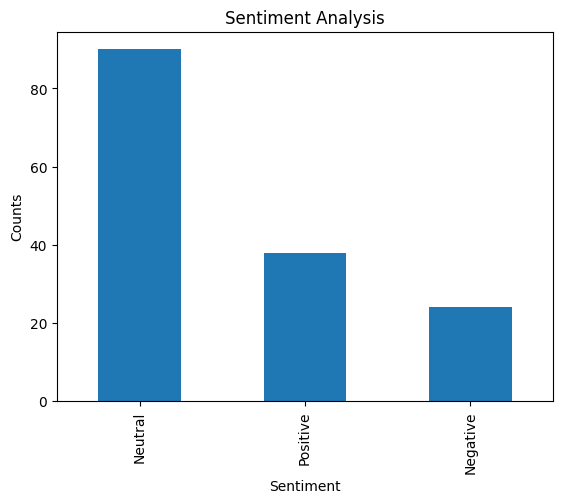

In [ ]:
# Plotting and visualizing the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tw_list['Analysis'].value_counts().plot(kind = 'bar')
plt.show()